In [19]:
import warnings
warnings.filterwarnings('ignore')



import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pathlib import Path
from collections import Counter
from datetime import datetime


from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

from datetime import datetime


In [24]:
#load yearly GDP data
yearly_gdp = 'Resources/Data/GDP-BEA-Yrly.csv'

y_gdp_df = pd.read_csv(yearly_gdp)

y_gdp_df

,Table 1.1.5. Gross Domestic Product,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,[Billions of dollars],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bureau of Economic Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Last Revised on: December 22, 2021 - Next Rele...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Line,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
4,NaN,Gross domestic product,Personal consumption expenditures,Personal consumption expenditures/Goods,Personal consumption expenditures/Goods/Durabl...,Personal consumption expenditures/Goods/Nondur...,Personal consumption expenditures/Services,Gross private domestic investment,Gross private domestic investment/Fixed invest...,Gross private domestic investment/Fixed invest...,...,Net exports of goods and services/Exports/Goods,Net exports of goods and services/Exports/Serv...,Net exports of goods and services/Imports,Net exports of goods and services/Imports/Goods,Net exports of goods and services/Imports/Serv...,Government consumption expenditures and gross ...,Government consumption expenditures and gross ...,Government consumption expenditures and gross ...,Government consumption expenditures and gross ...,Government consumption expenditures and gross ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,18695.1,12693.3,3991.8,1345.2,2646.7,8701.4,3205,3168.8,2469.3,...,1447.6,784.5,2738.4,2218.7,519.7,3303.1,1234.5,727.9,506.6,2068.5
93,2017,19479.6,13239.1,4158.6,1396.6,2761.9,9080.6,3381.4,3351.9,2591.6,...,1546.7,837.1,2923.7,2369.9,553.8,3399.1,1262.8,746.5,516.3,2136.3
94,2018,20527.2,13913.5,4353.7,1469.2,2884.5,9559.8,3637.8,3579.1,2780.6,...,1669.3,864.2,3129.7,2559.1,570.6,3572,1339,792.8,546.2,2233
95,2019,21372.6,14428.7,4478.9,1513.3,2965.6,9949.8,3826.3,3752.6,2938.7,...,1641.7,878,3116,2517.9,598.1,3713.9,1414.9,847.5,567.4,2299


In [25]:
y_gdp_df.drop([0,1,2,3,4])

,Table 1.1.5. Gross Domestic Product,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
5,1929,104.6,77.4,43.8,9.8,33.9,33.6,17.2,15.6,11.6,...,5.3,0.6,5.6,4.5,1.1,9.6,1.9,1.1,0.9,7.7
6,1930,92.2,70.1,38.2,7.7,30.5,32,11.4,11.7,9.2,...,3.9,0.5,4.1,3.1,1,10.3,2,1.1,0.9,8.3
7,1931,77.4,60.7,31.7,5.9,25.8,29,6.5,7.7,5.8,...,2.5,0.4,2.9,2.1,0.8,10.2,2.1,1.1,1,8.1
8,1932,59.5,48.7,24.1,4,20.2,24.6,1.8,4.2,3.3,...,1.7,0.3,1.9,1.3,0.6,8.9,2,1.1,1,6.9
9,1933,57.2,45.9,23.8,3.8,20,22.2,2.3,3.7,3,...,1.7,0.3,1.9,1.5,0.4,8.9,2.5,1,1.5,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2016,18695.1,12693.3,3991.8,1345.2,2646.7,8701.4,3205,3168.8,2469.3,...,1447.6,784.5,2738.4,2218.7,519.7,3303.1,1234.5,727.9,506.6,2068.5
93,2017,19479.6,13239.1,4158.6,1396.6,2761.9,9080.6,3381.4,3351.9,2591.6,...,1546.7,837.1,2923.7,2369.9,553.8,3399.1,1262.8,746.5,516.3,2136.3
94,2018,20527.2,13913.5,4353.7,1469.2,2884.5,9559.8,3637.8,3579.1,2780.6,...,1669.3,864.2,3129.7,2559.1,570.6,3572,1339,792.8,546.2,2233
95,2019,21372.6,14428.7,4478.9,1513.3,2965.6,9949.8,3826.3,3752.6,2938.7,...,1641.7,878,3116,2517.9,598.1,3713.9,1414.9,847.5,567.4,2299


In [26]:
#Load quarterly GDP data
quarterly_gdp = 'Resources/Data/GDP-BEA-Qtrly.csv'
q_gdp_df = pd.read_csv(quarterly_gdp)
q_gdp_df

,Quarter,Gross domestic product,Personal consumption expenditures total,Personal consumption expenditures/Goods,Personal consumption expenditures/Goods/Durable goods,Personal consumption expenditures/Goods/Nondurable goods,Personal consumption expenditures/Services,Gross private domestic investment,Gross private domestic investment/Fixed investment,Gross private domestic investment/Fixed investment/Nonresidential,...,Net exports of goods and services/Exports/Goods,Net exports of goods and services/Exports/Services,Net exports of goods and services/Imports,Net exports of goods and services/Imports/Goods,Net exports of goods and services/Imports/Services,Government consumption expenditures and gross investment,Government consumption expenditures and gross investment/Federal,Government consumption expenditures and gross investment/Federal/National defense,Government consumption expenditures and gross investment/Federal/Nondefense,Government consumption expenditures and gross investment/State and local
0,1947Q1,243.2,156.2,95.6,20.7,74.9,60.6,35.9,35.4,24.8,...,15.7,2.7,7.5,5.6,1.9,40.3,27.0,22.8,4.2,13.3
1,1947Q2,246.0,160.0,98.2,21.4,76.9,61.8,34.5,35.7,25.2,...,16.7,2.8,8.2,6.3,1.9,40.1,26.4,21.1,5.3,13.7
2,1947Q3,249.6,163.5,100.4,21.8,78.6,63.1,34.9,37.8,25.4,...,16.8,2.6,7.7,5.8,1.8,39.4,25.0,20.0,5.1,14.3
3,1947Q4,259.7,167.7,103.5,23.5,80.0,64.2,43.3,41.8,26.5,...,15.1,2.5,8.3,6.2,2.2,39.5,24.5,20.4,4.1,15.0
4,1948Q1,265.7,170.4,105.1,23.5,81.5,65.3,47.2,43.6,28.2,...,14.6,2.3,9.6,7.3,2.3,40.9,25.4,20.7,4.7,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2020Q3,21138.6,14293.8,4867.2,1753.3,3113.9,9426.6,3708.8,3693.8,2776.6,...,1413.0,666.6,2805.3,2368.8,436.5,3861.7,1515.1,883.9,631.3,2346.5
295,2020Q4,21477.6,14467.6,4867.3,1759.2,3108.1,9600.4,3923.2,3865.9,2862.7,...,1520.8,699.9,3019.1,2540.8,478.3,3885.3,1512.3,900.8,611.5,2373.0
296,2021Q1,22038.2,15005.4,5245.0,1957.8,3287.2,9760.4,3928.0,4022.2,2956.7,...,1607.5,704.4,3184.5,2698.1,486.4,3977.3,1568.6,897.1,671.6,2408.7
297,2021Q2,22741.0,15681.7,5529.8,2092.2,3437.6,10151.9,3925.1,4099.4,3029.2,...,1726.8,734.8,3343.2,2819.0,524.2,4015.9,1563.3,904.1,659.2,2452.6


In [ ]:
q_gdp_df.dtypes

In [59]:
#Load Yearly Energy Consumption by Sector 
yearly_energy = 'Resources/Data/Table_2.1_Energy_Consumption_by_Sector_yrly_1949.csv'
y_energy_df = pd.read_csv(yearly_energy)
y_energy_df

,Year,Primary Energy Consumed by the Residential Sector(Trillion Btu),Total Energy Consumed by the Residential Sector(Trillion Btu),Primary Energy Consumed by the Commercial Sector(Trillion Btu),Total Energy Consumed by the Commercial Sector(Trillion Btu),Primary Energy Consumed by the Industrial Sector(Trillion Btu),Total Energy Consumed by the Industrial Sector(Trillion Btu),Primary Energy Consumed by the Transportation Sector(Trillion Btu),Total Energy Consumed by the Transportation Sector(Trillion Btu),Primary Energy Consumed by the Electric Power Sector(Trillion Btu),Energy Consumption Balancing Item(Trillion Btu),Primary Energy Consumption Total(Trillion Btu)
0,1949,4460.588,5599.404,2668.909,3668.856,12619.463,14709.664,7879.511,7990.017,4339.470,-0.165,31967.775
1,1950,4829.528,5988.744,2834.144,3893.348,13872.181,16223.978,8383.410,8492.476,4679.283,0.021,34598.567
2,1951,5104.680,6380.397,2737.738,3873.280,15106.734,17657.898,8933.492,9041.900,5070.830,0.186,36953.661
3,1952,5158.406,6560.456,2672.968,3873.442,14649.497,17289.295,8906.901,9002.762,5338.183,0.082,36726.037
4,1953,5052.749,6558.982,2512.438,3771.044,15315.027,18187.575,9030.068,9123.035,5730.355,-0.038,37640.598
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2016,6029.784,20178.597,4321.462,18030.418,21553.204,31346.819,27736.828,27812.000,37726.556,-4.494,97363.341
68,2017,6097.177,19886.446,4368.244,17899.859,21952.689,31797.661,27974.118,28049.359,37241.097,0.414,97633.739
69,2018,6981.532,21509.095,4775.874,18439.768,22861.052,32756.500,28429.246,28505.042,38162.700,-6.992,101203.413
70,2019,7088.212,21072.288,4800.109,18013.153,22939.804,32671.864,28596.828,28670.930,37003.283,5.833,100434.068


In [40]:
#Load Quarterly Energy Consumption by Sector 
quarterly_energy = 'Resources/Data/Table_2.1_Energy_Consumption_by_Sector_Qtrly_1973.csv'
q_energy_df = pd.read_csv(quarterly_energy)


<AxesSubplot:>

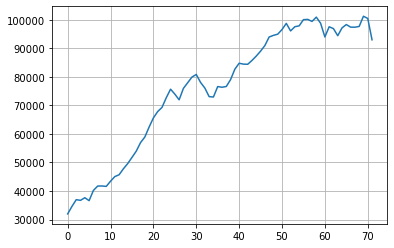

In [60]:
%matplotlib inline 
y_energy_df['Primary Energy Consumption Total(Trillion Btu)'].plot(grid='on')

In [76]:

from datetime import datetime as dt

startdate = dt(1947, 1, 1).date()
enddate = dt(2020, 1, 1).date()
q_gdp_df.loc[startdate:enddate]
q_gdp_df[(startdate <= q_gdp_df.index) & (q_gdp_df.index <= enddate)].plot(grid='on')

TypeError: '<' not supported between instances of 'str' and 'datetime.date'

In [ ]:
#Time Series decomposition for Quarterly GDP 
decomposition = sm.tsa.seasonal_decompose(q_gdp_df, model='additive')
fig = decomposition.plot()

In [ ]:
matplotlib.rcParams[] = [12.0, 8.0]

In [ ]:
fig, ax = plt.subplots()
ax.grid(True)

year= mdates.YearLocator(month=)
month = mdates.MonthLocator(interval=)
year_format = mdates.DateFormatter("%Y")
month_format = mdates.DateFormatter("%m")

ax.xaxis.set_minor_locator(month)

ax.xaxis.grid(True, which='minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot()
plot.plot(decompostition.trend. , decomposition.trend, c='red')

In [ ]:
#Modelling